# Data Load In

In [1]:
import seaborn as sns
import pandas as pd
import sys
sys.setrecursionlimit(100000)

In [2]:
data_path = "../data/keywords_scores_cleaned.csv"

In [3]:
df = pd.read_csv(data_path)

In [4]:
df["Protein Name"].nunique()

30882

In [5]:
df

,Protein Name,Reference proteome,Proteomics identification,Phosphoprotein,Membrane,Cytoplasm,Acetylation,Alternative splicing,3D-structure,Nucleus,...,Tumor antigen,Nemaline myopathy,Hydrogen peroxide,Schizophrenia,cGMP-binding,Proline metabolism,Leber hereditary optic neuropathy,Corneal dystrophy,Quinone,Craniosynostosis
0,I3LF89,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,J3KNK1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O89090,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,A0A1B0GW42,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Q9Y2Q9,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30877,F1LQ50,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30878,Q15008,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
30879,H0Y524,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30880,Q9JJ43,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning and Preprocessing

In [41]:
# smaller df for testing 
top_keys_df = df.drop(df.iloc[:, 51:], axis=1)

In [44]:
top_keys_df = top_keys_df.drop(columns=["Reference proteome"])

In [45]:
# reset index to allow for better transpose results
top_keys_df = top_keys_df.set_index("Protein Name")

In [78]:
# remove rows with less than 5 unique keywords since most data have very few keywords
# this makes data more sparse
rows_to_drop = []
for i in range(30882):
    if top_keys_df.iloc[i].value_counts()[0] > 45:
        rows_to_drop.append(i)

In [81]:
dropped_less_than_5_keys = top_keys_df.drop(top_keys_df.index[rows_to_drop])

In [85]:
import matplotlib.pyplot as plt

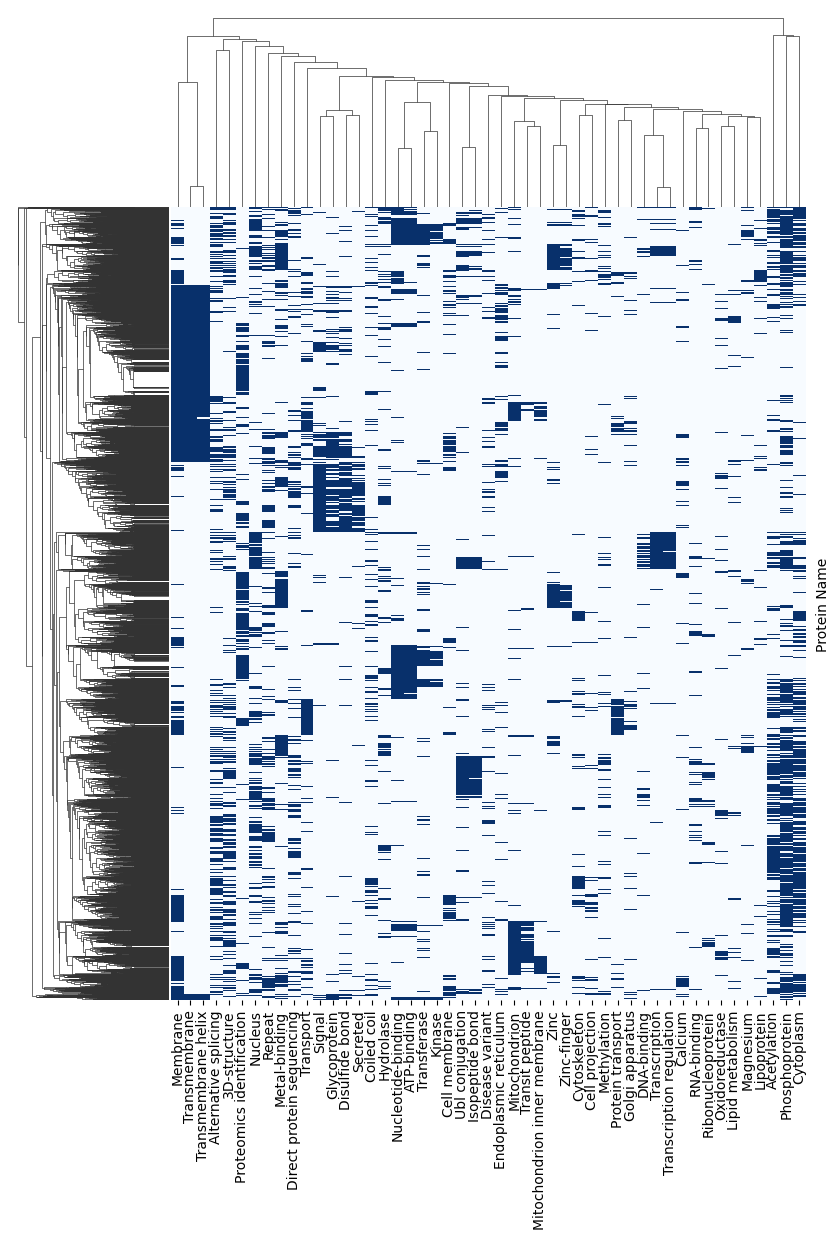

In [97]:
cm = sns.clustermap(dropped_less_than_5_keys, yticklabels=False, xticklabels=1, figsize=(8.5, 12.5), cmap="Blues")
cm.cax.set_visible(False)

AttributeError: 'ClusterGrid' object has no attribute 'show'